# Macroeconomic data with Quandl

# What is quandl?

https://www.quandl.com/
    
https://www.quandl.com/search or only free data https://www.quandl.com/search?filters=%5B%22Free%22%5D

-Types of data you can obtain with quandl and links

-Quandl Api

In [1]:
!pip install quandl

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
quandl.ApiConfig.api_key = "hc12Qsz4uPr9Zq_Uq2GP"

In [3]:
# ODA & ISO

In [4]:
#ISO table here

In [5]:
#Example of ISO

In [6]:
def macro_by_country(metric):
    
    ISO = pd.read_csv('ISO.csv')
    
    metric_df = pd.DataFrame(index=pd.date_range(start="1900", end = '2019', freq='A'))

    for i in range(len(ISO)):
        try:
            metric_df[ISO['name'][i]] = quandl.get('ODA/{}_{}'.format(ISO['alpha-3'][i], metric))
        except:
            print("Data for {} not found".format(ISO['name'][i]))
    
    metric_df = metric_df.dropna(how='all')
    metric_df = metric_df.dropna(how='all',axis=1)
    
    return metric_df

In [7]:
GDP_PC = macro_by_country('NGDPDPC')

Data for Åland Islands not found
Data for American Samoa not found
Data for Andorra not found
Data for Anguilla not found
Data for Antarctica not found
Data for Aruba not found
Data for Bermuda not found
Data for Bonaire, Sint Eustatius and Saba not found
Data for Bouvet Island not found
Data for British Indian Ocean Territory not found
Data for Cayman Islands not found
Data for Christmas Island not found
Data for Cocos (Keeling) Islands not found
Data for Cook Islands not found
Data for Cuba not found
Data for Curaçao not found
Data for Falkland Islands (Malvinas) not found
Data for Faroe Islands not found
Data for French Guiana not found
Data for French Polynesia not found
Data for French Southern Territories not found
Data for Gibraltar not found
Data for Greenland not found
Data for Guadeloupe not found
Data for Guam not found
Data for Guernsey not found
Data for Heard Island and McDonald Islands not found
Data for Holy See not found
Data for Isle of Man not found
Data for Jersey n

In [8]:
GDP_PC_2000 = GDP_PC['2000':]
GDP_PC_2000 = GDP_PC_2000.dropna(axis=1)

In [9]:
GDP_growth_pc = (GDP_PC_2000.iloc[-1]/GDP_PC_2000.iloc[0] - 1) * 100

In [10]:
GDP_growth_pc.sort_values(ascending=False)[:10].index

Index(['China', 'Angola', 'Sudan', 'Kazakhstan', 'Turkmenistan',
       'Lao People's Democratic Republic', 'Ethiopia', 'Myanmar', 'Azerbaijan',
       'Romania'],
      dtype='object')

Text(0.5,1,'Top 10 Fastest Growing Economies 2000-2022 GDP Per Capita (% Increase)')

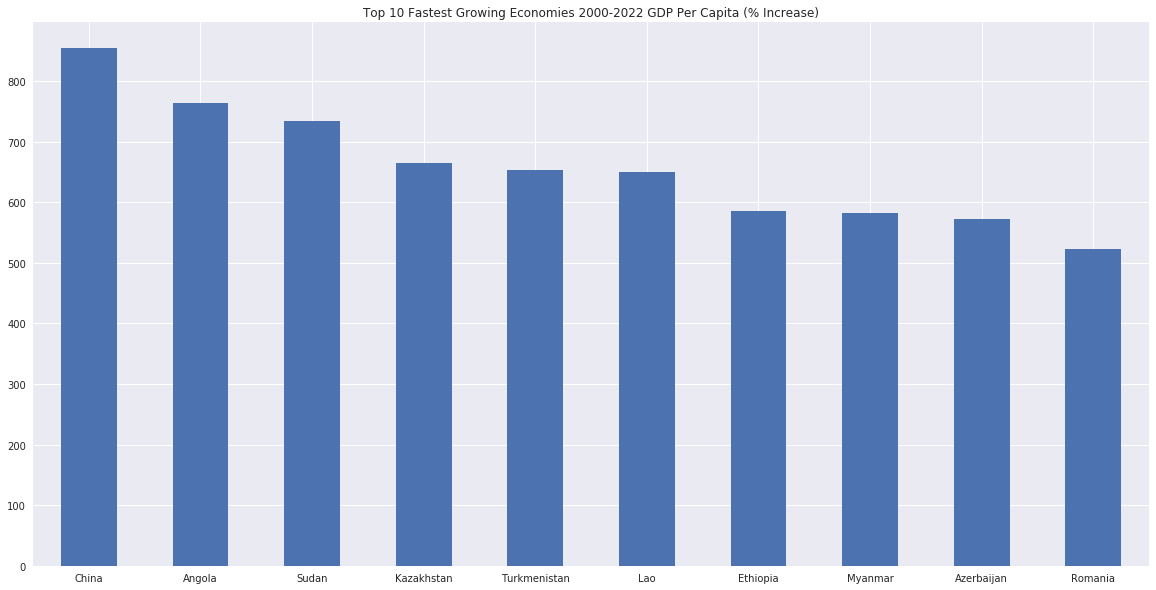

In [11]:
plt.figure(figsize=(20,10))

GDP_growth_pc.sort_values(ascending=False)[:10].plot.bar()

plt.xticks([i for i in range(10)], [item.split()[0] for item in GDP_growth_pc.sort_values(ascending=False)[:10].index],  rotation='horizontal')

plt.title('Top 10 Fastest Growing Economies 2000-2022 GDP Per Capita (% Increase)')

In [12]:
NGDP = macro_by_country('NGDPD')

NGDP_2000 = NGDP['2000':'2018']

NGDP_2000 = NGDP_2000.dropna(axis=1)

GDP_growth = (NGDP_2000.iloc[18]/NGDP_2000.iloc[0] - 1) * 100

Data for Åland Islands not found
Data for American Samoa not found
Data for Andorra not found
Data for Anguilla not found
Data for Antarctica not found
Data for Aruba not found
Data for Bermuda not found
Data for Bonaire, Sint Eustatius and Saba not found
Data for Bouvet Island not found
Data for British Indian Ocean Territory not found
Data for Cayman Islands not found
Data for Christmas Island not found
Data for Cocos (Keeling) Islands not found
Data for Cook Islands not found
Data for Cuba not found
Data for Curaçao not found
Data for Falkland Islands (Malvinas) not found
Data for Faroe Islands not found
Data for French Guiana not found
Data for French Polynesia not found
Data for French Southern Territories not found
Data for Gibraltar not found
Data for Greenland not found
Data for Guadeloupe not found
Data for Guam not found
Data for Guernsey not found
Data for Heard Island and McDonald Islands not found
Data for Holy See not found
Data for Isle of Man not found
Data for Jersey n

Text(0.5,1,'Top 10 Fastest Growing Economies 2000-2018 GDP')

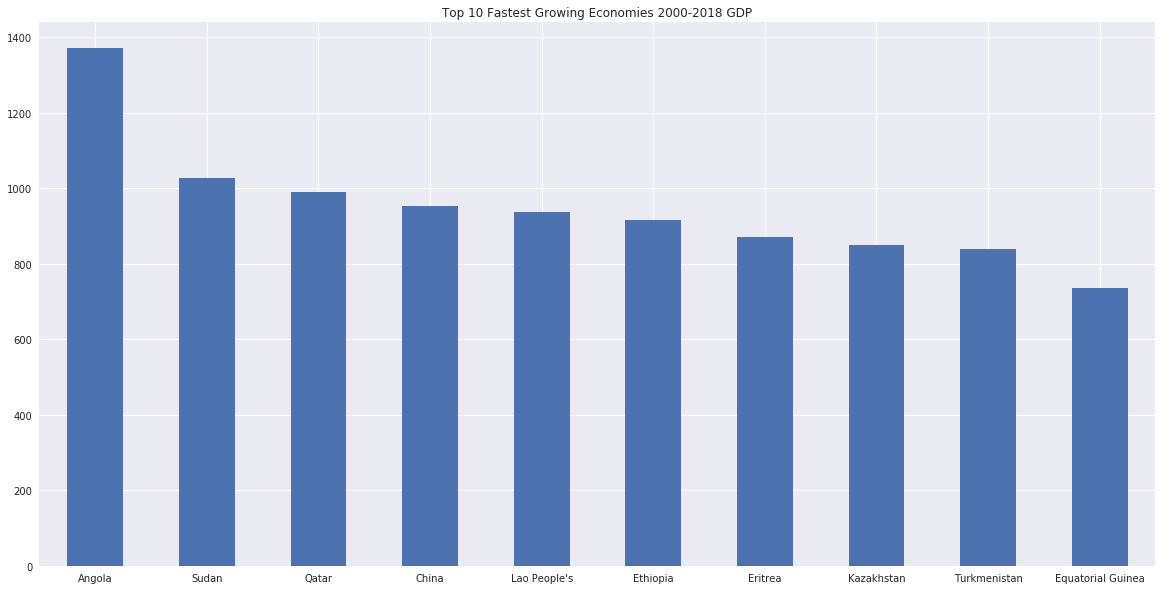

In [20]:
plt.figure(figsize=(20,10))

GDP_growth.sort_values(ascending=False)[:10].plot.bar()

plt.xticks([i for i in range(10)], [' '.join(item.split()[:2]) for item in GDP_growth.sort_values(ascending=False)[:10].index],  rotation='horizontal')

plt.title('Top 10 Fastest Growing Economies 2000-2018 GDP')

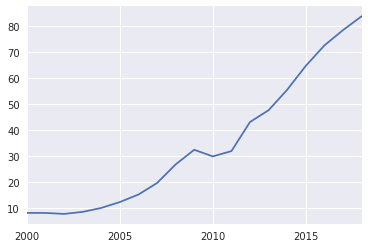

In [14]:
NGDP_2000['Ethiopia'].plot()